In [54]:
import csv
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Read in all draft csvs
files = []
for file in os.listdir("drafts"):
    if file.endswith(".csv"):
        files.append(os.path.join("drafts", file))

print("Found " + str(len(files)) + " drafts to analyze")

drafts = []
for file in files:
    picks = []
    with open(file, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if (row[0] == "Overall Pick"):
                continue
            picks.append(row)
    cleansed_picks = clean_data(picks)
    drafts.append(cleansed_picks)

print("Finished parsing all drafts")

def get_pick_num_by_player(picks, player):
    for pick in picks:
        if player in pick[3]:
            return pick

def get_draft_pick_nums(pick_num):
    draft_pick_nums = []
    for i in range(0, 20):
        if i % 2 == 0:
            draft_pick_nums.append((i * 12) + pick_num)
        elif i % 2 == 1:
            draft_pick_nums.append((i * 12) + (13 - pick_num))
    return draft_pick_nums

def get_team_for_pick_num(picks, draft_pick_nums):
    for i in draft_pick_nums:
        print(picks[i-1])

def num_of_positions_taken(picks, position, round):
    counter = 0
    for i in range(0, round*12):
        if (picks[i][4] == position):
            counter = counter + 1
    return counter

def clean_data(picks):
    cleansed_picks = []
    for pick in picks:
        items = []
        items.append(pick[0].strip()) # absolute pick number
        items.append(pick[1].strip()) # round
        items.append(pick[2].strip()) # pick in round
        player_data = pick[-5:]
        items.append(player_data[1].strip() + " " + player_data[0].strip()) # first + last name
        items.append(player_data[2].strip()) # position
        items.append(player_data[3].strip()) # team
        items.append(player_data[4].strip()) # bye
        cleansed_picks.append(items)
    return cleansed_picks

Found 24 drafts to analyze
Finished parsing all drafts


In [126]:
# Find adps for every player
player_adp = {}

for draft in drafts:
    for pick in draft:
        if (pick[4] == 'WR'):
            player = pick[3]
            if player in player_adp:
                player_pick_nums = player_adp[player]
                player_pick_nums.append(pick[0])
            else:
                player_pick_nums = [pick[0]]
                player_adp[player] = player_pick_nums

In [127]:
df = pd.DataFrame()
df['Player'] = []
df['Pick'] = []

all_players = player_adp.keys()
count = 30
skip = 0
for player in all_players:
    count = count - 1
    #skip = skip + 1
    #if skip < 5:
    #    continue
    if count <= 0:
        break
    player_picks = player_adp[player]
    player_picks = [int(x) for x in player_picks]
    for pick in player_picks:
        df = df.append({'Player' : player, 'Pick' : pick}, ignore_index = True)
    #adp_sum = sum(int(x) for x in player_picks)
    #print(player + " - " + str(round(adp_sum / len(drafts), 1)))

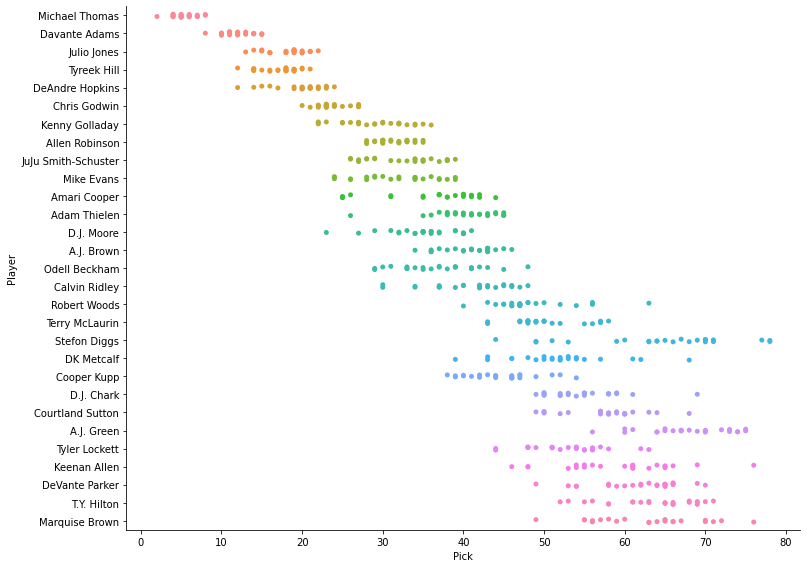

In [128]:
sns.catplot(x="Pick", y="Player", data=df, height=8, aspect=11.7/8.27);

In [129]:
#fig, ax = plt.subplots(figsize=(14,8))
#sns.swarmplot(x="Pick", y="Player", data=df, ax=ax)

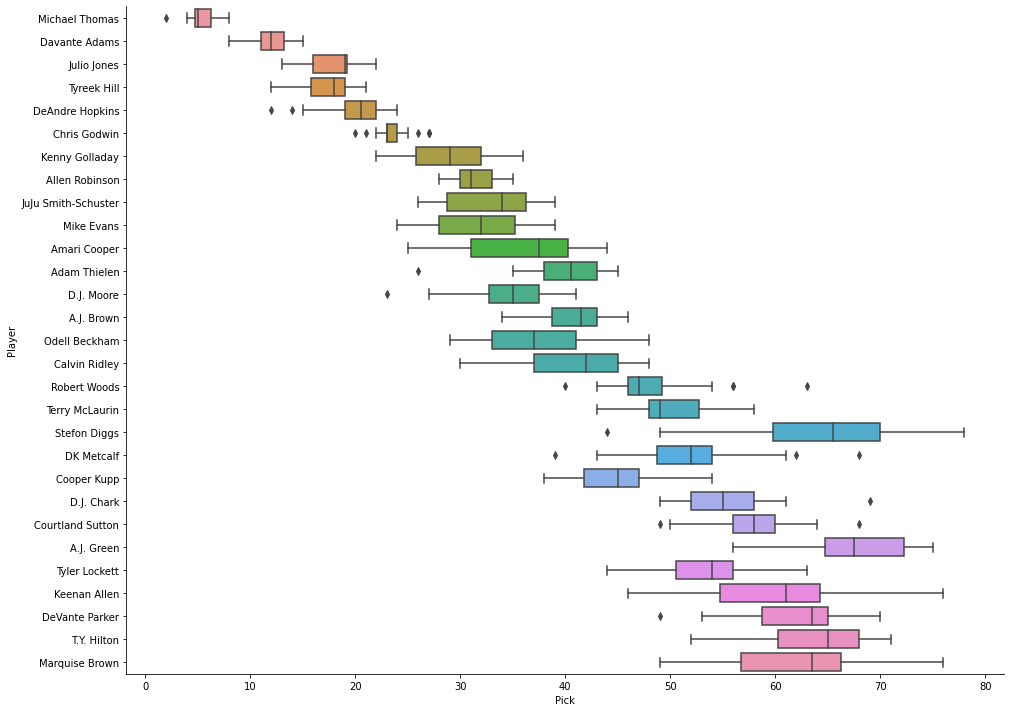

In [130]:
sns.catplot(x="Pick", y="Player", kind="box", data=df, orient='h', height=10, aspect=11.7/8.27);

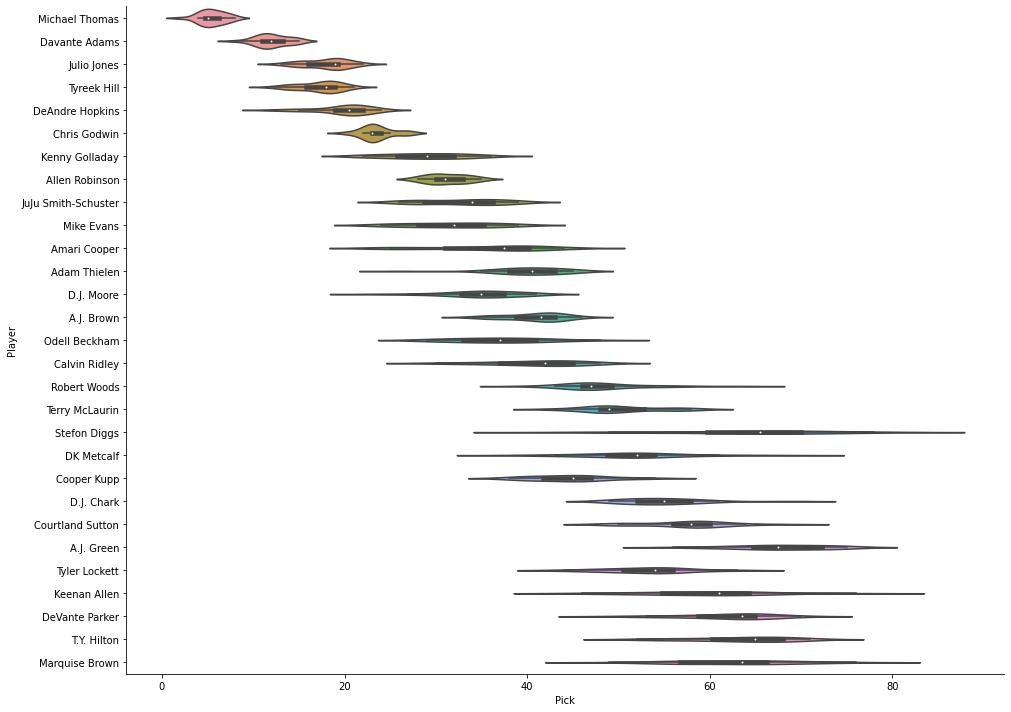

In [131]:
sns.catplot(x="Pick", y="Player", kind="violin", data=df, height=10, aspect=11.7/8.27);